## Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

## Loading Data

In [ ]:
df=pd.read_excel("HealthCareData.xlsx")

Knowing the Data

In [ ]:
df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [ ]:
df["Blood pressure (mmhg)"].value_counts()

Blood pressure (mmhg)
110/70     135
130/90      74
130/80      68
140/90      56
120/80      45
112/70      40
140/100     37
140/80      37
130/70      34
116/80      30
120/70      21
130/76      20
118/70      20
98/60       19
160/100     19
138/90      19
140/84      18
108/72      13
96/62       10
120/91      10
80/60       10
110/170     10
100/60      10
138/88      10
98/70       10
102/60      10
70/60       10
90/60       10
102/70      10
126/70      10
130/78      10
120/86      10
120/78      10
114/70      10
116/70       9
142/84       9
144/92       9
136/82       9
150/94       9
130/84       9
126/86       9
98/72        8
134/84       8
150/90       1
108/75       1
120/79       1
110/80       1
124/84       1
120/90       1
Name: count, dtype: int64

In [ ]:
df.shape

(950, 42)

We can see that the outcome is highly unbalanced

In [ ]:
df["Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)"].value_counts()


Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)
YES    876
no      20
Name: count, dtype: int64

In [ ]:
df.shape

(950, 42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 42 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   S.NO                                                                     950 non-null    int64  
 1   Age                                                                      950 non-null    int64  
 2   Gender                                                                   950 non-null    object 
 3   Place(location where the patient lives)                                  816 non-null    object 
 4   Duration of alcohol consumption(years)                                   950 non-null    int64  
 5   Quantity of alcohol consumption (quarters/day)                           950 non-null    int64  
 6   Type of alcohol consumed                                                 9

Total null values

In [ ]:
df.isnull().sum()

S.NO                                                                         0
Age                                                                          0
Gender                                                                       0
Place(location where the patient lives)                                    134
Duration of alcohol consumption(years)                                       0
Quantity of alcohol consumption (quarters/day)                               0
Type of alcohol consumed                                                     0
Hepatitis B infection                                                        0
Hepatitis C infection                                                        0
Diabetes Result                                                              0
Blood pressure (mmhg)                                                        0
Obesity                                                                      0
Family history of cirrhosis/ hereditary             

All duplicate rows

In [ ]:
df.duplicated().sum()

0

All the object columns in the dataset

In [ ]:
object_cols = df.select_dtypes(include='object').columns.tolist()
for col in object_cols:
  print(col)

Gender
Place(location where the patient lives)
Type of alcohol consumed
Hepatitis B infection
Hepatitis C infection
Diabetes Result
Blood pressure (mmhg)
Obesity
Family history of cirrhosis/ hereditary
TG
LDL
Total Bilirubin    (mg/dl)
A/G Ratio
USG Abdomen (diffuse liver or  not)
Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)


We can see TG LDL and Bilirubin are object type but they have numeric values

In [ ]:
print(df["TG"].head(3))
print(df["LDL"].head(3))
print(df["Total Bilirubin    (mg/dl)"].head(3))

0    115
1    115
2    115
Name: TG, dtype: object
0    120
1    120
2    120
Name: LDL, dtype: object
0    7
1    7
2    7
Name: Total Bilirubin    (mg/dl), dtype: object


By using value_counts() we can notice that:

*   TG contains a row - 130LDL
*   LD contains a row - HDL
*   Bilirubin contains a row - o.4






In [ ]:
print(df["TG"].value_counts())
print(df["LDL"].value_counts())
print(df["Total Bilirubin    (mg/dl)"].value_counts())

TG
160       65
156       42
120       37
184       32
180       30
190       28
170       27
166       19
186       18
172       18
174       17
136       14
168       13
146       13
150       11
140       11
118       11
130       10
197       10
151       10
188       10
178        9
195        9
115        9
173        9
177        9
100        9
86         9
162        9
171        8
176        8
206        8
192        8
200        8
189        8
106        8
164        8
144        7
139        1
130LDL     1
Name: count, dtype: int64
LDL
120    82
110    58
108    56
96     50
105    40
104    33
79     32
116    18
90     18
85     17
98     17
109    14
129    13
80     11
122    10
136    10
115    10
88     10
94     10
65      9
49      9
200     9
180     9
100     9
99      9
91      9
86      8
106     8
HDL     1
220     1
111     1
Name: count, dtype: int64
Total Bilirubin    (mg/dl)
7       77
4.8     48
4.2     40
6       40
6.8     39
8.4     39
5.6     38
10.9   

Dropping those rows

In [ ]:
df = df[df['TG'] != '130LDL']
df = df[df['LDL'] != 'HDL']
df = df[df['Total Bilirubin    (mg/dl)'] != 'o.4']

Converting into float

In [ ]:
df["TG"] = df["TG"].astype(float)
df["LDL"] = df["LDL"].astype(float)
df["Total Bilirubin    (mg/dl)"] = df["Total Bilirubin    (mg/dl)"].astype(float)

Changing Blood Pressure into Proper format

In [ ]:
df["Blood pressure (mmhg)"].value_counts()

Blood pressure (mmhg)
110/70     135
130/90      74
130/80      66
140/90      56
120/80      45
112/70      40
140/100     37
140/80      37
130/70      34
116/80      30
120/70      21
130/76      20
118/70      20
98/60       19
160/100     19
138/90      19
140/84      18
108/72      13
96/62       10
120/91      10
80/60       10
110/170     10
100/60      10
138/88      10
98/70       10
102/60      10
70/60       10
90/60       10
102/70      10
126/70      10
130/78      10
120/86      10
120/78      10
114/70      10
116/70       9
142/84       9
144/92       9
136/82       9
150/94       9
130/84       9
98/72        8
134/84       8
126/86       8
150/90       1
108/75       1
120/79       1
110/80       1
124/84       1
120/90       1
Name: count, dtype: int64

In [ ]:
 df["Blood pressure (mmhg)"] = df["Blood pressure (mmhg)"].str.replace('/', '/').str.split('/').apply(lambda x: float(x[0]) / float(x[1]))

## Cleansing Numerical Columns

Checking for abnormal distribution in Quantity of alcohol

In [ ]:
df["Quantity of alcohol consumption (quarters/day)"].value_counts()

Quantity of alcohol consumption (quarters/day)
2      520
3      198
1      158
4       54
180     16
5        1
Name: count, dtype: int64

Removing the abnormalities

In [ ]:
df["Quantity of alcohol consumption (quarters/day)"] = df["Quantity of alcohol consumption (quarters/day)"].replace(180, 5)


In [ ]:
df["Quantity of alcohol consumption (quarters/day)"].value_counts()

Quantity of alcohol consumption (quarters/day)
2    520
3    198
1    158
4     54
5     17
Name: count, dtype: int64

Checking abnormalities in platelets

In [ ]:
df["Platelet Count  (lakhs/mm)"].value_counts()

Platelet Count  (lakhs/mm)
1.200        100
1.500         84
1.800         68
1.000         51
1.100         49
1.700         46
1.400         41
1.600         37
1.900         29
2.300         22
2.000         20
1.670         20
1.300         20
1.380         20
0.980         19
1.550         19
1.420         18
2.400         11
1.350         10
1.320         10
1.170         10
1.280         10
1.020         10
2.800         10
1.090         10
1.560         10
1.760         10
0.520         10
0.650         10
1.580         10
2.200         10
0.910         10
0.780         10
1.160         10
1.036         10
1.210         10
1.450         10
0.940          9
1.220          9
1.830          9
1.920          9
1.520          9
1.340          9
1.230          9
0.900          5
90000.000      5
3.000          3
1.750          2
2.500          2
3.200          2
0.550          1
Name: count, dtype: int64

Removing the abnormalities

In [ ]:
df = df[df["Platelet Count  (lakhs/mm)"] != 90000.000]


Filling all numerical columns with their mean

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
  df[col].fillna(df[col].mean(), inplace=True)

df.isnull().sum()

<ipython-input-1144-5ea656d4b9e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mean(), inplace=True)


S.NO                                                                         0
Age                                                                          0
Gender                                                                       0
Place(location where the patient lives)                                    133
Duration of alcohol consumption(years)                                       0
Quantity of alcohol consumption (quarters/day)                               0
Type of alcohol consumed                                                     0
Hepatitis B infection                                                        0
Hepatitis C infection                                                        0
Diabetes Result                                                              0
Blood pressure (mmhg)                                                        0
Obesity                                                                      0
Family history of cirrhosis/ hereditary             

In [ ]:
df["TG"] = df["TG"].astype(int)
df["LDL"] = df["LDL"].astype(int)

<ipython-input-1145-9684f9d2d0ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TG"] = df["TG"].astype(int)
<ipython-input-1145-9684f9d2d0ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["LDL"] = df["LDL"].astype(int)


Viewing A/G ratio

In [ ]:
df["A/G Ratio"].value_counts()

A/G Ratio
0.75                   86
01:01:00               59
01:03:00               32
01:02:00               28
1900-01-01 00:00:00    24
02:01:00               21
1.214                  20
0.6                    20
1.5:1                  19
0.5                    19
0.77                   18
0.87                   18
03:01:00               16
0.6:1                  13
02:03:00               12
0.44                   10
0.575                  10
0.42                   10
0.8                    10
1.18                   10
0.84                   10
1.66                   10
2.2                     9
0.72                    9
0.86                    9
0.48                    9
0.31                    9
0.5.                    9
0.78                    9
2.45                    9
1.8                     6
1.68                    6
00:01:02.200000         6
12:00:00                4
00:01:00.875000         3
00:01:01.500000         3
00:01:03.500000         3
1900-01-03 00:00:00     3
19

Checking Albumin abnormalities

In [ ]:
df["Albumin   (g/dl)"].value_counts()

Albumin   (g/dl)
2.000000     148
3.000000     136
2.500000      69
3.200000      57
1.200000      51
2.100000      48
1.800000      38
2.800000      37
1.600000      30
2.700000      29
4.000000      28
2.900000      27
1.500000      21
2.300000      20
2.200000      19
3.100000      19
4.200000      12
1.000000      10
7.700000      10
1.900000      10
0.900000      10
1.400000      10
5.000000      10
3.400000      10
1.100000      10
22.000000      9
2.797106       9
2.600000       9
3.600000       9
4.600000       9
5.400000       9
8.100000       8
2.400000       5
4.500000       2
3.800000       2
5.200000       2
Name: count, dtype: int64

Removing them

Checking Globulin and removing abnormalities

In [ ]:
df=df[df["Albumin   (g/dl)"]!=22.0]

In [ ]:
df["Globulin  (g/dl)"].value_counts()

Globulin  (g/dl)
4.000000     127
2.000000     118
3.000000      88
2.800000      65
2.500000      51
3.100000      47
3.500000      41
4.300000      38
1.000000      30
3.245455      29
3.800000      29
3.600000      27
4.100000      20
6.000000      19
3.300000      19
4.800000      19
2.200000      18
2.600000      18
4.200000      10
3.200000      10
4.500000      10
4.600000      10
4.900000      10
1.600000      10
4.400000      10
5.100000      10
2.700000      10
1.800000      10
2.300000       9
3.700000       9
3.900000       9
3.400000       2
30.000000      1
Name: count, dtype: int64

In [ ]:
df=df[df["Globulin  (g/dl)"]!=30.0]

Making it in the correct format

In [ ]:
df["A/G Ratio"] = round(df["Albumin   (g/dl)"]/df["Globulin  (g/dl)"],2)

In [ ]:
df["A/G Ratio"].value_counts()

A/G Ratio
1.00    99
0.75    87
0.67    49
0.43    30
0.50    30
0.61    29
0.86    24
1.14    20
3.00    20
1.50    20
0.32    20
0.89    19
0.49    19
0.87    19
0.81    19
2.00    19
0.54    18
0.78    18
0.90    18
0.46    11
1.20    11
0.37    11
0.42    10
1.10    10
0.44    10
1.19    10
0.64    10
0.60    10
1.68    10
0.29    10
0.39    10
0.36    10
0.40    10
0.84    10
0.25    10
1.67    10
1.21    10
0.38    10
0.57    10
2.20    10
0.94    10
0.41    10
0.79     9
1.82     9
2.45     9
0.33     9
2.30     9
0.77     9
0.69     9
1.23     9
0.93     9
0.88     9
1.07     9
0.72     9
2.50     8
1.80     2
1.27     2
1.53     2
Name: count, dtype: int64

In [ ]:
df["A/G Ratio"]=df["A/G Ratio"].astype(float)

In [ ]:
df["A/G Ratio"].fillna(df["A/G Ratio"].mean(), inplace=True)

Viewing all null values left in the dataset

In [ ]:
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]
for column, count in null_columns.items():
  print(f"{column}: {count}")


Place(location where the patient lives): 133
Predicted Value(Out Come-Patient suffering from liver  cirrosis or not): 54


## Viewing the spread of data in Categorical columns

In [ ]:
for i in df.columns:
  if df[i].dtype == 'object' and i!="Blood pressure (mmhg)":
    print(df[i].value_counts())
    print("-"*50)

Gender
male           723
female         194
female          10
transgender      5
Name: count, dtype: int64
--------------------------------------------------
Place(location where the patient lives)
rural    443
urban    355
 ocun      1
Name: count, dtype: int64
--------------------------------------------------
Type of alcohol consumed
country liquor     468
both               282
branded liquor     181
 branded liquor      1
Name: count, dtype: int64
--------------------------------------------------
Hepatitis B infection
negative    779
Positive    152
positive      1
Name: count, dtype: int64
--------------------------------------------------
Hepatitis C infection
negative    796
Positive    134
positive      2
Name: count, dtype: int64
--------------------------------------------------
Diabetes Result
YES    633
NO     299
Name: count, dtype: int64
--------------------------------------------------
Obesity
yes    536
no     396
Name: count, dtype: int64
-------------------------

Cleaning the Place column

In [ ]:
df = df[df['Place(location where the patient lives)'] != ' ocun']

Cleaning the Gender column

In [ ]:
df["Gender"].replace("female ","female",inplace=True)

<ipython-input-1158-fc8ed781fdc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"].replace("female ","female",inplace=True)


In [ ]:
df["Gender"].value_counts()

Gender
male           722
female         204
transgender      5
Name: count, dtype: int64

Cleaning alcohol conumption

In [ ]:
df["Type of alcohol consumed"].replace(" branded liquor","branded liquor",inplace=True)

<ipython-input-1160-54b9cbf74f34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Type of alcohol consumed"].replace(" branded liquor","branded liquor",inplace=True)


In [ ]:
df["Type of alcohol consumed"].value_counts()

Type of alcohol consumed
country liquor    468
both              281
branded liquor    182
Name: count, dtype: int64

Cleaning hepatitis column

In [ ]:
df["Hepatitis B infection"].replace("Positive","positive",inplace=True)
df["Hepatitis C infection"].replace("Positive","positive",inplace=True)

<ipython-input-1162-455dde732033>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hepatitis B infection"].replace("Positive","positive",inplace=True)
<ipython-input-1162-455dde732033>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hepatitis C infection"].replace("Positive","positive",inplace=True)


In [ ]:
df["Hepatitis B infection"].value_counts()

Hepatitis B infection
negative    778
positive    153
Name: count, dtype: int64

In [ ]:
df["Hepatitis C infection"].value_counts()

Hepatitis C infection
negative    795
positive    136
Name: count, dtype: int64

Cleaning family history column

In [ ]:
df["Family history of cirrhosis/ hereditary"].replace("husband","yes",inplace=True)
df["Family history of cirrhosis/ hereditary"].value_counts()

<ipython-input-1165-f41e3444a412>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Family history of cirrhosis/ hereditary"].replace("husband","yes",inplace=True)


Family history of cirrhosis/ hereditary
no     853
yes     78
Name: count, dtype: int64

Converting rest of columns to proper format

In [ ]:
df["Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)"].replace("YES","yes",inplace=True)
df["Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)"].value_counts()

<ipython-input-1166-ec710178de1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)"].replace("YES","yes",inplace=True)


Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)
yes    859
no      18
Name: count, dtype: int64

# Checking data spread in categorical columns after cleaning

In [ ]:
for i in df.columns:
  if df[i].dtype == 'object' and i!="Blood pressure (mmhg)":
    print(df[i].value_counts())
    print("-"*50)

Gender
male           722
female         204
transgender      5
Name: count, dtype: int64
--------------------------------------------------
Place(location where the patient lives)
rural    443
urban    355
Name: count, dtype: int64
--------------------------------------------------
Type of alcohol consumed
country liquor    468
both              281
branded liquor    182
Name: count, dtype: int64
--------------------------------------------------
Hepatitis B infection
negative    778
positive    153
Name: count, dtype: int64
--------------------------------------------------
Hepatitis C infection
negative    795
positive    136
Name: count, dtype: int64
--------------------------------------------------
Diabetes Result
YES    633
NO     298
Name: count, dtype: int64
--------------------------------------------------
Obesity
yes    536
no     395
Name: count, dtype: int64
--------------------------------------------------
Family history of cirrhosis/ hereditary
no     853
yes     78
Na

Dropping unnecessary columns

In [ ]:
df.drop(columns=["Place(location where the patient lives)","S.NO"],inplace=True)

Cleaning outcome

In [ ]:
df.rename(columns={"Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)": "Outcome"}, inplace=True)


In [ ]:
df.columns

Index(['Age', 'Gender', 'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TCH', 'TG',
       'LDL', 'HDL', 'Hemoglobin  (g/dl)', 'PCV  (%)',
       'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)',
       'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count',
       'Polymorphs  (%) ', 'Lymphocytes  (%)', 'Monocytes   (%)',
       'Eosinophils   (%)', 'Basophils  (%)', 'Platelet Count  (lakhs/mm)',
       'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'A/G Ratio', 'AL.Phosphatase      (U/L)',
       'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)',
       'USG Abdomen (diffuse liver or  not)', 'Outcome'],
      dtype='o

We can see that there are more yes than no

In [ ]:
df["Outcome"].value_counts()

Outcome
yes    859
no      18
Name: count, dtype: int64

In [ ]:
df["Outcome"].isnull().sum()

54

Filling all null values of the column with yes

In [ ]:
df["Outcome"].fillna("yes", inplace=True)


## **THE DATA HAS BEEN CLEANED**

In [ ]:
df.isnull()

,Age,Gender,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Blood pressure (mmhg),Obesity,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Outcome
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
946,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
947,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
948,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Viewing all outliers and cleaning them

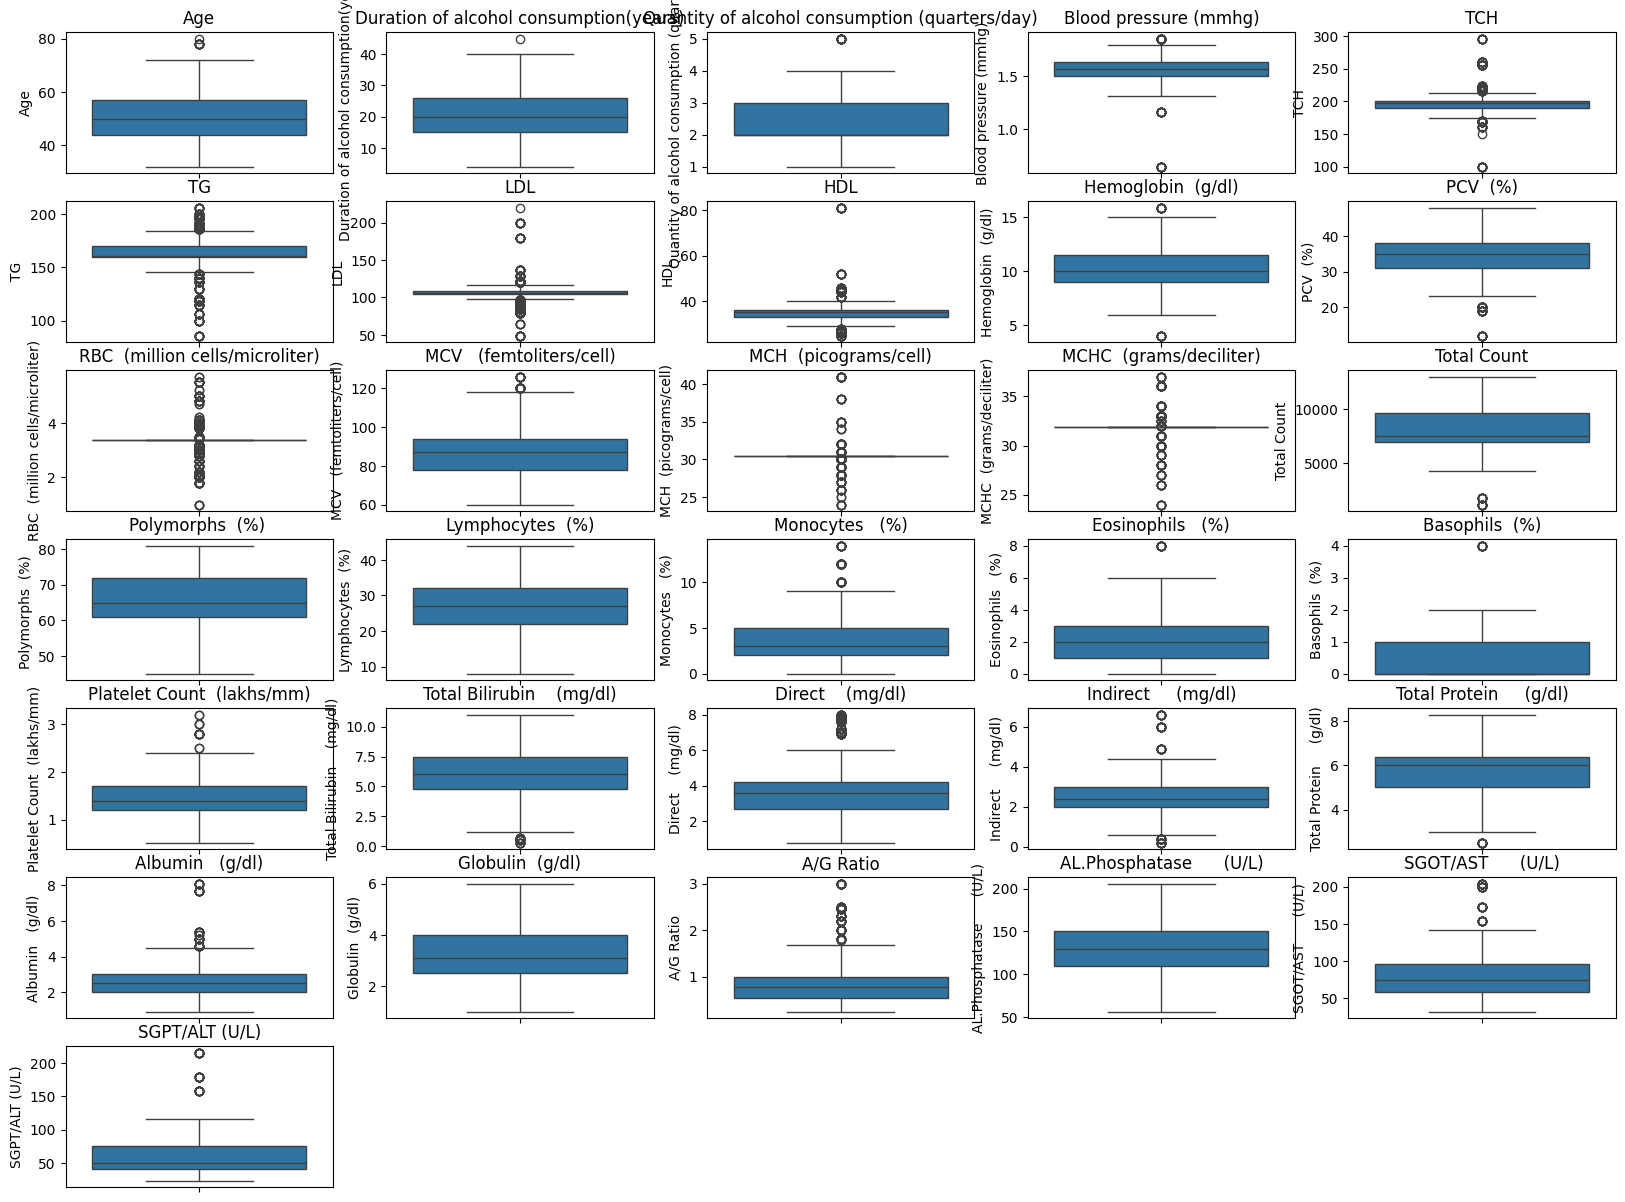

In [ ]:
c=0
plt.figure(figsize=(20,15))
for i in df.columns:
  if(type(df[i][0])!=str):
    plt.subplot(7,5,c+1)
    # Attempt to convert the column to numeric, handling errors by coercing them to NaN
    sns.boxplot(df[i].apply(pd.to_numeric, errors='coerce'))
    plt.title(i)
    c=c+1
plt.show()

Removing using IQR

In [ ]:
def remove_outliers(df, columns):
  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound,np.where(df[col] > upper_bound, upper_bound, df[col]))

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
remove_outliers(df, numerical_columns)

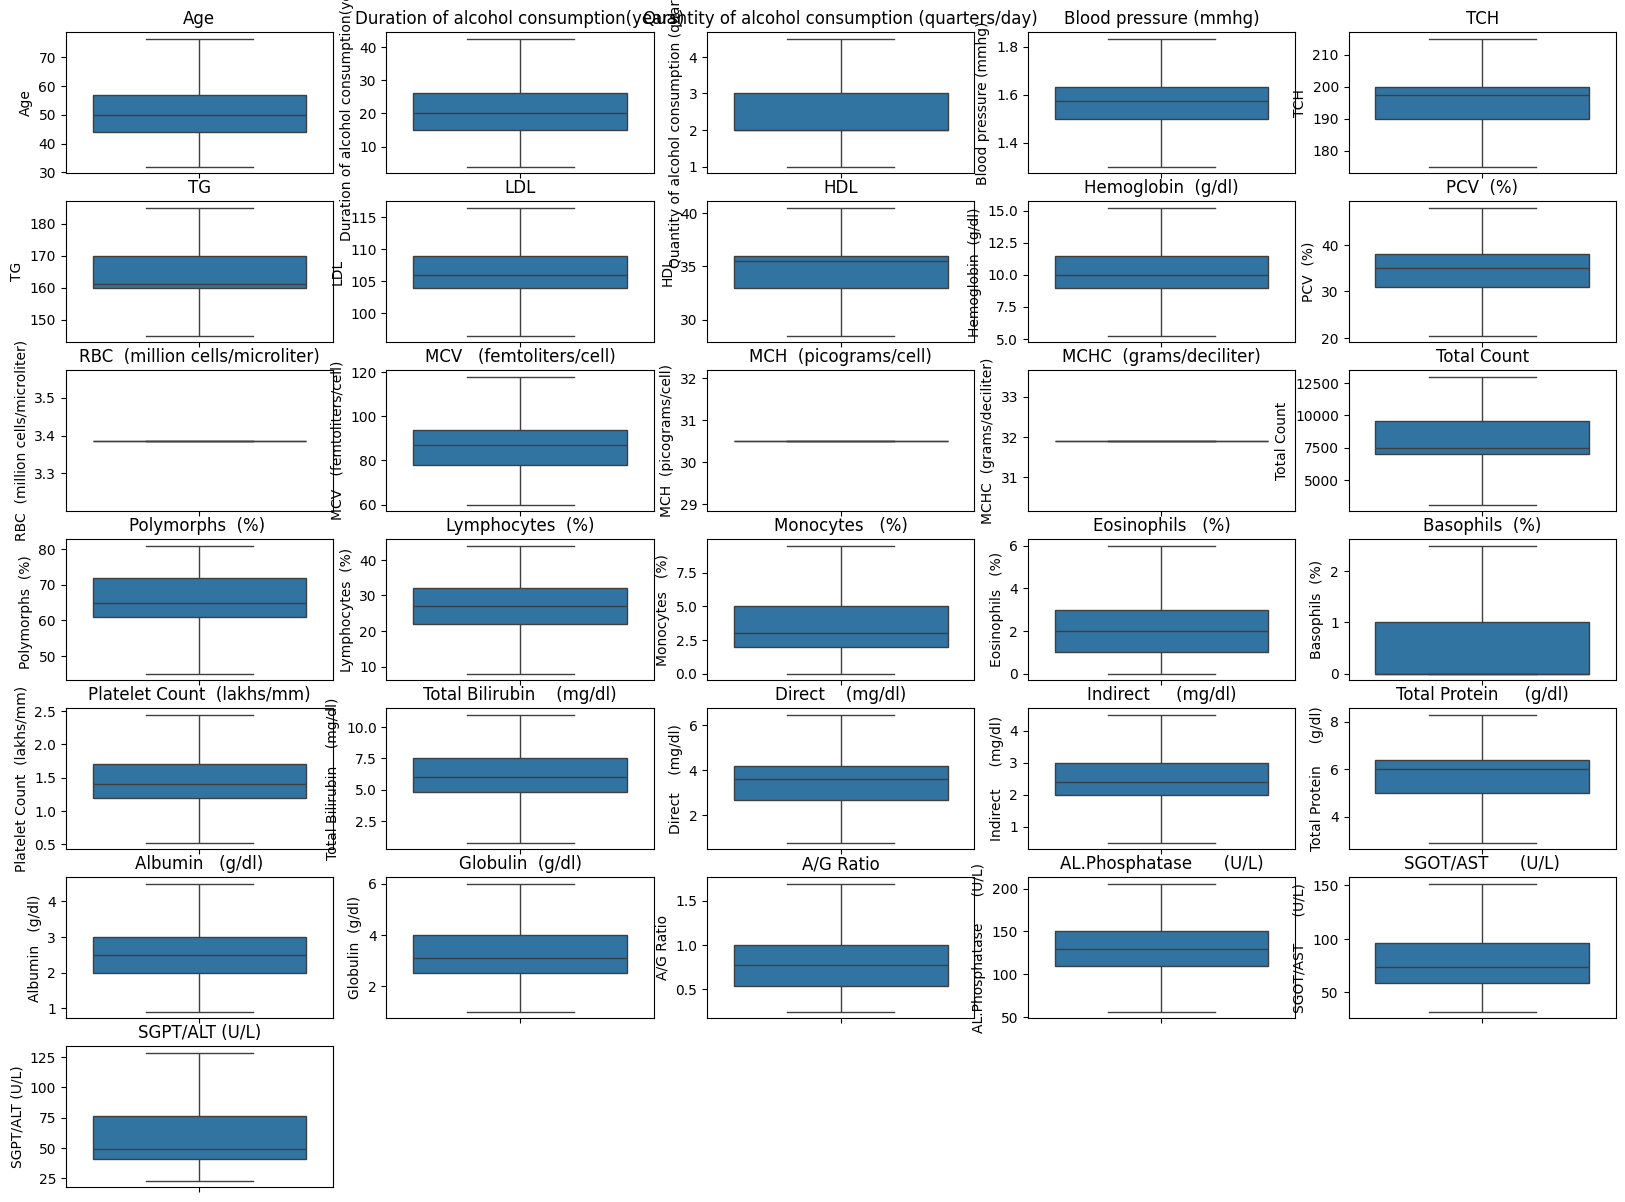

In [ ]:
c=0
plt.figure(figsize=(20,15))
for i in df.columns:
  if(type(df[i][0])!=str):
    plt.subplot(7,5,c+1)
    # Attempt to convert the column to numeric, handling errors by coercing them to NaN
    sns.boxplot(df[i].apply(pd.to_numeric, errors='coerce'))
    plt.title(i)
    c=c+1
plt.show()

## *UNI-VARIATE ANALYSIS*



Representing all the important numerical columns in distplot

<ipython-input-1178-964f2275be06>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-1178-964f2275be06>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-1178-964f2275be06>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in s

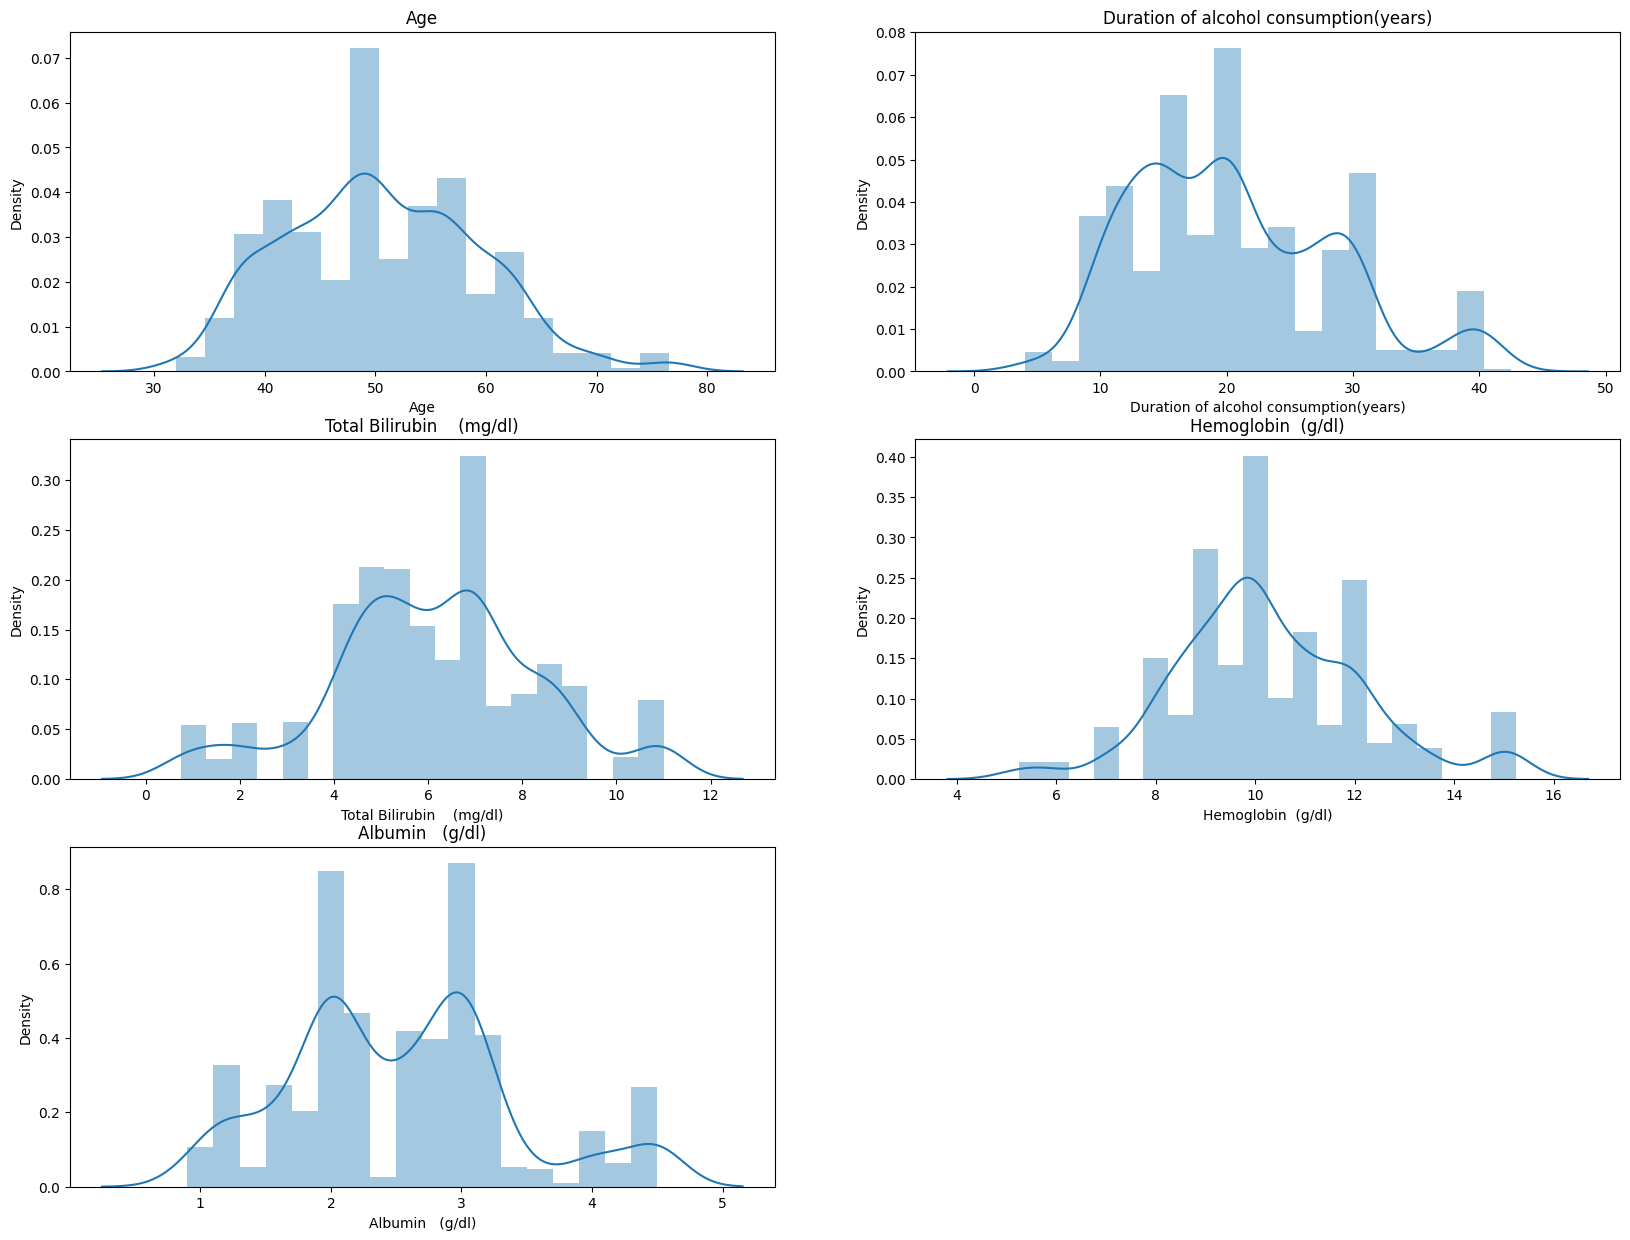

In [ ]:

l=['Age','Duration of alcohol consumption(years)','Total Bilirubin    (mg/dl)','Hemoglobin  (g/dl)','Albumin   (g/dl)']

plt.figure(figsize=(20, 15))

for i, col in enumerate(l):
    plt.subplot(3, 2, i + 1)
    sns.distplot(df[col])
    plt.title(col)

plt.show()


Inferences from Density Plots

 **Age Distribution**:
   - The majority of patients fall within the 40-60 age range.
   - There is a noticeable peak around the age of 50, indicating a higher frequency of patients in their early 50s.

2. **Duration of Alcohol Consumption**:
   - The duration of alcohol consumption varies widely among patients.
   - A significant proportion of patients have been consuming alcohol for around 15-25 years, with a peak at approximately 20 years.

3. **Total Bilirubin**:
   - The total bilirubin levels show a wide distribution, with a peak around 6 mg/dl.
   - There are some patients with very high bilirubin levels, indicating possible liver dysfunction.

4. **Hemoglobin Levels**:
   - Hemoglobin levels are generally distributed around a mean of approximately 10 g/dl.
   - The distribution shows a peak around 10-12 g/dl, suggesting that most patients have moderate to normal hemoglobin levels.

Representing all the important catogorical columns in pie chart

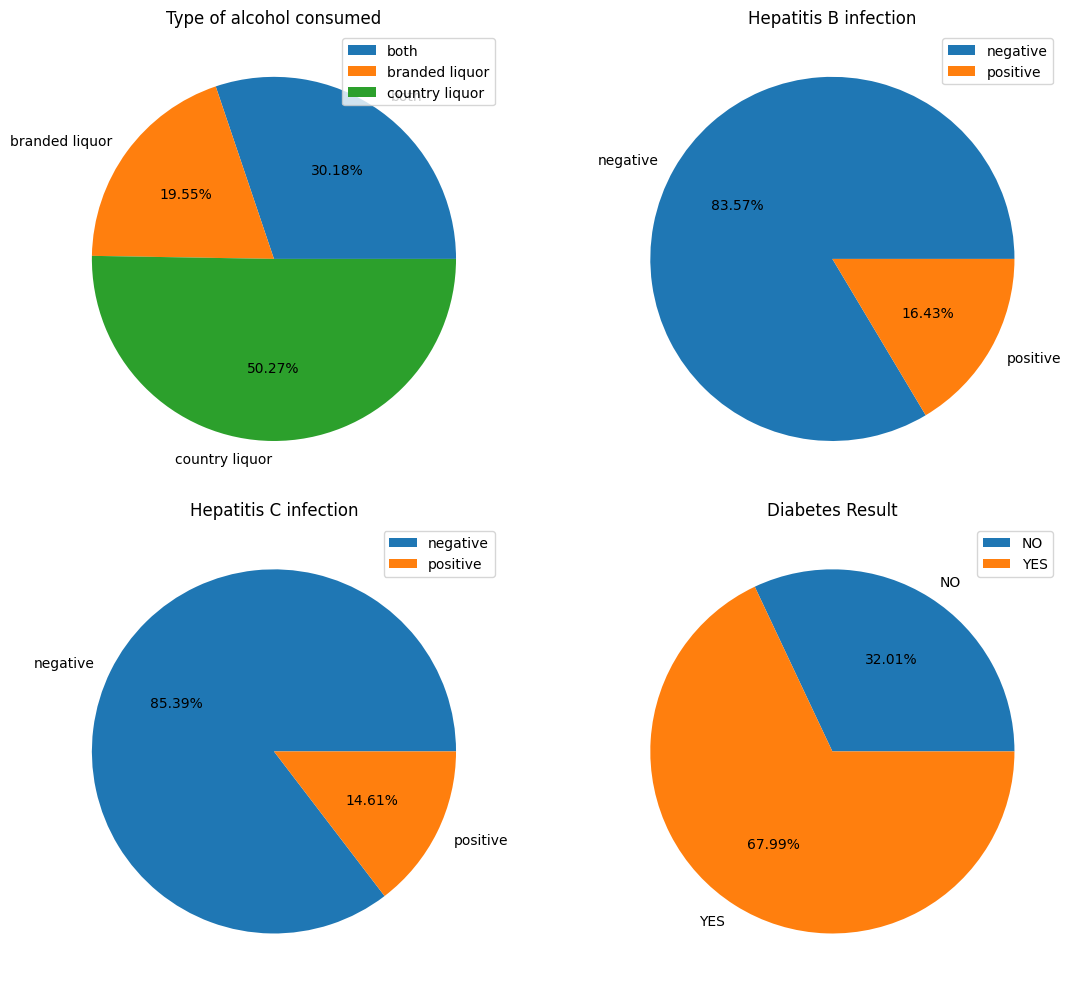

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Type of alcohol consumed
df.groupby("Type of alcohol consumed").size().plot(kind="pie", autopct="%.2f%%", ax=axes[0, 0], legend=True)
axes[0, 0].set_title("Type of alcohol consumed")

# Hepatitis B infection
df.groupby("Hepatitis B infection").size().plot(kind="pie", autopct="%.2f%%", ax=axes[0, 1], legend=True)
axes[0, 1].set_title("Hepatitis B infection")

# Hepatitis C infection
df.groupby("Hepatitis C infection").size().plot(kind="pie", autopct="%.2f%%", ax=axes[1, 0], legend=True)
axes[1, 0].set_title("Hepatitis C infection")

# Diabetes Result
df.groupby("Diabetes Result").size().plot(kind="pie", autopct="%.2f%%", ax=axes[1, 1], legend=True)
axes[1, 1].set_title("Diabetes Result")



plt.tight_layout()
plt.show()

OUTCOME

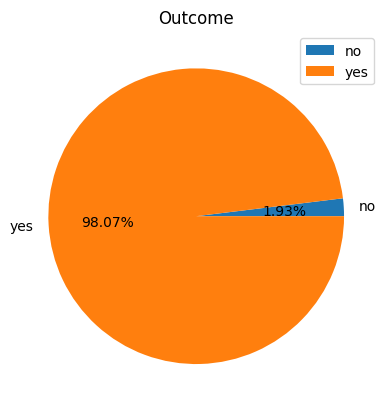

In [ ]:

df.groupby("Outcome").size().plot(kind="pie", autopct="%.2f%%",legend=True)
plt.title('Outcome')
plt.show()

# **BI-VARIATE ANALYSIS**

# How does age vary with outcome

<Axes: xlabel='Outcome', ylabel='Age'>

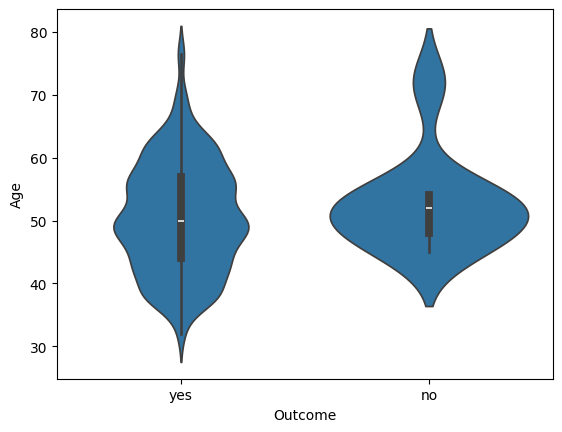

In [ ]:
sns.violinplot(y=df["Age"],x=df["Outcome"])

Inferences from Violin Plot

The violin plot shows the age distribution for patients with and without liver cirrhosis.

- **Patients with Liver Cirrhosis (Yes)**:
  - Broader age distribution with multiple peaks.
  - Concentration around 50-60 years.

- **Patients without Liver Cirrhosis (No)**:
  - More uniform age distribution.
  - Noticeable peak around 50 years.

**Conclusion**

Liver cirrhosis affects a wider range of ages, especially 50-60 years, while the age distribution for patients without cirrhosis is more consistent.



# How does protein influence outcome

<Axes: xlabel='Outcome', ylabel='Total Protein     (g/dl)'>

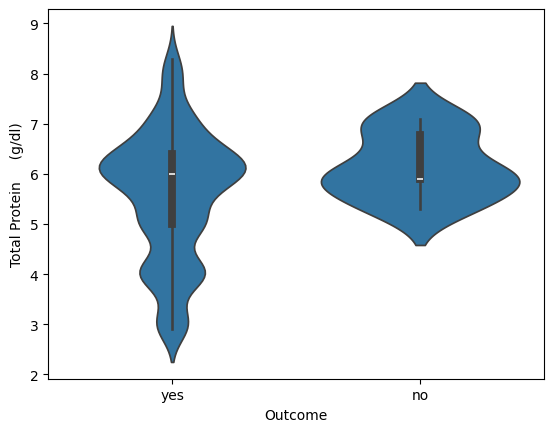

In [ ]:
sns.violinplot(y=df["Total Protein     (g/dl)"],x=df["Outcome"])


**Total Protein Distribution:**

Patients with liver cirrhosis ("yes") have a wider distribution of total protein levels ranging from approximately 3 g/dl to 9 g/dl.

Patients without liver cirrhosis ("no") have a slightly narrower distribution, with total protein levels ranging from approximately 4.5 g/dl to 8 g/dl.

**Median Total Protein Levels:**

The median total protein level in patients with liver cirrhosis is slightly higher than in those without liver cirrhosis, as indicated by the white dot in the center of each violin.els.


**PROTEIN LEVEL HAS CONSIDERABLE EFFECT ON OUTCOME**

# How does haemoglobin affect the outcome

<Axes: xlabel='Outcome', ylabel='Hemoglobin  (g/dl)'>

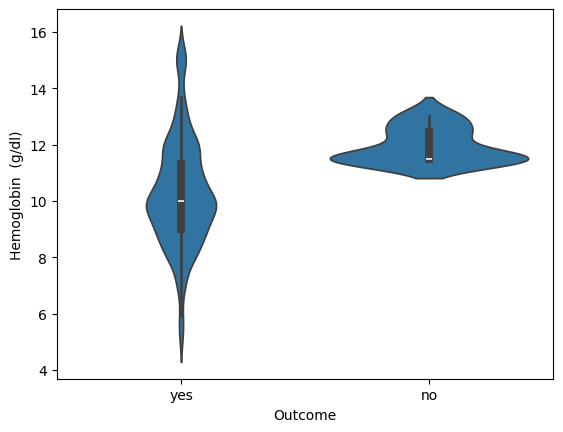

In [ ]:
sns.violinplot(y=df["Hemoglobin  (g/dl)"],x=df["Outcome"])

**Distribution:**

Cirrhosis ("yes"): Hemoglobin levels range broadly from approximately 4 g/dl to 16 g/dl.

No cirrhosis ("no"): Hemoglobin levels are more concentrated, ranging from about 11 g/dl to 14 g/dl.
Median Levels:

Cirrhosis: The median hemoglobin level is around 10 g/dl.

No Cirrhosis: The median hemoglobin level is also around 11.5 g/dl.


**Comparison:**
   - Liver disease is associated with a wider range of hemoglobin levels.
   - No liver disease shows more consistent hemoglobin levels centered around 11.5 g/dl.

**HAEMOGLOBIN INFLUENCES THE OUTCOME**

How does the distribution of gender affect the outcome

<Axes: xlabel='Gender', ylabel='count'>

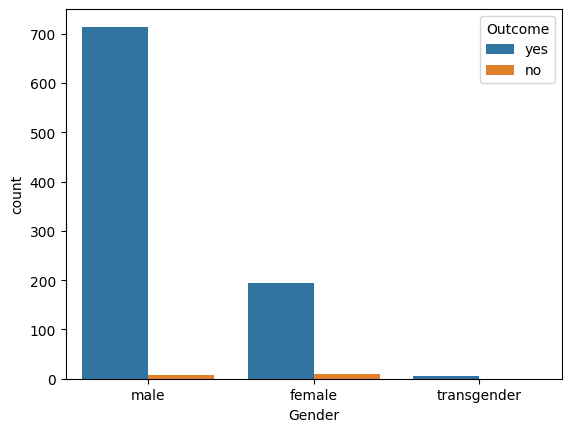

In [ ]:
sns.countplot(data=df,x="Gender",hue="Outcome")

**Adviceable to drop the column since it is highly biased**

# Scatter-Plots

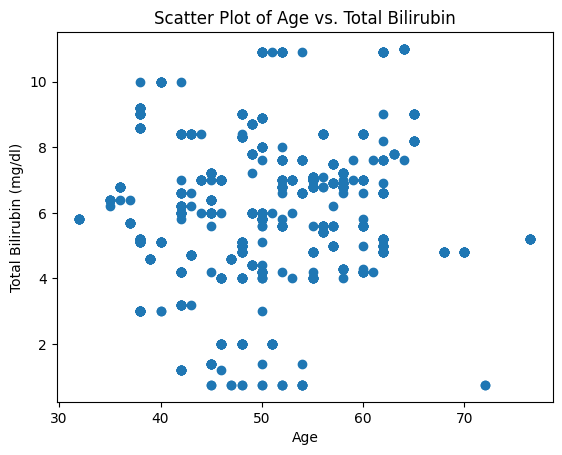

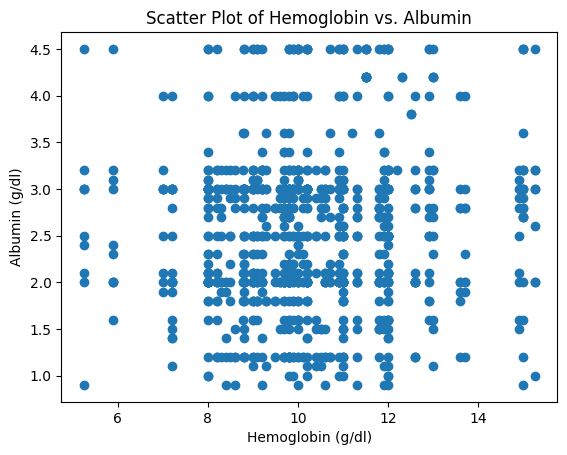

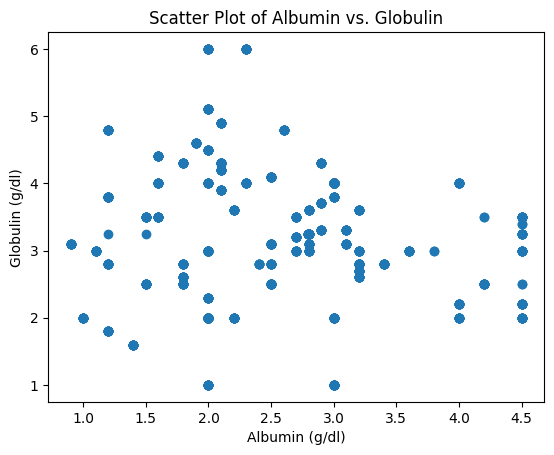

In [ ]:
import matplotlib.pyplot as plt
# Scatter plot of Age vs. Total Bilirubin
plt.scatter(df["Age"], df["Total Bilirubin    (mg/dl)"])
plt.xlabel("Age")
plt.ylabel("Total Bilirubin (mg/dl)")
plt.title("Scatter Plot of Age vs. Total Bilirubin")
plt.show()

# Scatter plot of Hemoglobin vs. Albumin
plt.scatter(df["Hemoglobin  (g/dl)"], df["Albumin   (g/dl)"])
plt.xlabel("Hemoglobin (g/dl)")
plt.ylabel("Albumin (g/dl)")
plt.title("Scatter Plot of Hemoglobin vs. Albumin")
plt.show()

# Scatter plot of Albumin vs. Globulin
plt.scatter(df["Albumin   (g/dl)"], df["Globulin  (g/dl)"])
plt.xlabel("Albumin (g/dl)")
plt.ylabel("Globulin (g/dl)")
plt.title("Scatter Plot of Albumin vs. Globulin")
plt.show()


### Inferences from the Scatter Plot of Albumin vs. Globulin:

1. **No Strong Correlation**:
   - The scatter plot indicates no strong linear relationship between albumin and globulin levels. The data points are widely scattered, suggesting that variations in albumin levels do not directly predict changes in globulin levels.

2. **Range of Values**:
   - Most albumin levels fall within the range of 2.0 to 4.0 g/dl, while globulin levels range from 2.0 to 5.0 g/dl. There are some outliers with higher globulin levels up to 6.0 g/dl and albumin levels up to 4.5 g/dl, indicating diverse liver function profiles among the patients.

# **MULTI-VARIATE ANALYSIS**

In [ ]:
df1=df.copy()

Dropping all the unnecessary columns

In [ ]:
df1.drop(columns=["Gender",'TCH','TG','LDL','RBC  (million cells/microliter)','MCH  (picograms/cell)','MCHC  (grams/deciliter)','Total Count','Eosinophils   (%)','Globulin  (g/dl)'],inplace=True)

Correlation Matrix

In [ ]:
df1.corr(numeric_only=True)

,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Blood pressure (mmhg),HDL,Hemoglobin (g/dl),PCV (%),MCV (femtoliters/cell),Polymorphs (%),Lymphocytes (%),...,Platelet Count (lakhs/mm),Total Bilirubin (mg/dl),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
Age,1.000000,0.504880,-0.014838,-0.051067,0.027021,0.005643,0.097591,0.044536,0.102051,-0.051998,...,0.071371,0.111111,0.056810,0.241744,0.061647,-0.025472,-0.072670,0.117445,0.051609,0.104097
Duration of alcohol consumption(years),0.504880,1.000000,0.013511,0.052442,0.102488,-0.066525,-0.003214,0.275167,0.263651,-0.363089,...,-0.093403,-0.180130,-0.258064,0.098370,-0.127660,-0.266224,-0.150173,0.312834,0.305667,0.220968
Quantity of alcohol consumption (quarters/day),-0.014838,0.013511,1.000000,-0.235936,0.087929,-0.028515,-0.106242,-0.003966,-0.001482,0.102467,...,0.111797,-0.058668,-0.070019,0.068496,-0.176093,-0.004464,0.128809,-0.094731,-0.062926,-0.080740
Blood pressure (mmhg),-0.051067,0.052442,-0.235936,1.000000,-0.047842,-0.012078,0.018328,0.071560,0.248554,0.012415,...,0.130282,-0.076937,-0.112301,0.029902,-0.027565,0.105403,0.117146,0.047766,0.086927,-0.055243
HDL,0.027021,0.102488,0.087929,-0.047842,1.000000,-0.031386,-0.042923,-0.003529,-0.170594,-0.014607,...,-0.145335,0.038456,-0.001202,0.038557,0.038159,-0.181625,-0.173873,-0.143857,0.071819,0.064580
Hemoglobin (g/dl),0.005643,-0.066525,-0.028515,-0.012078,-0.031386,1.000000,-0.006746,-0.026800,-0.023490,0.010444,...,0.021393,-0.046225,0.015173,-0.019270,0.036043,0.069044,0.040801,-0.009615,-0.009007,-0.046745
PCV (%),0.097591,-0.003214,-0.106242,0.018328,-0.042923,-0.006746,1.000000,-0.215279,-0.061485,0.099383,...,0.260573,0.006346,0.124041,-0.147214,0.310499,0.348276,0.120090,0.003518,-0.152265,-0.186766
MCV (femtoliters/cell),0.044536,0.275167,-0.003966,0.071560,-0.003529,-0.026800,-0.215279,1.000000,0.096923,-0.223638,...,0.029725,-0.301073,-0.408698,-0.007832,-0.193946,-0.129655,0.021159,-0.043319,0.278110,0.235697
Polymorphs (%),0.102051,0.263651,-0.001482,0.248554,-0.170594,-0.023490,-0.061485,0.096923,1.000000,-0.479791,...,-0.056582,0.096292,-0.048245,0.163071,-0.079210,-0.153799,-0.044456,0.047370,-0.100152,0.067920
Lymphocytes (%),-0.051998,-0.363089,0.102467,0.012415,-0.014607,0.010444,0.099383,-0.223638,-0.479791,1.000000,...,0.382883,0.087118,0.220090,-0.092456,0.180241,0.387191,0.197401,0.006548,-0.215464,-0.283448


Heatmap

<Axes: >

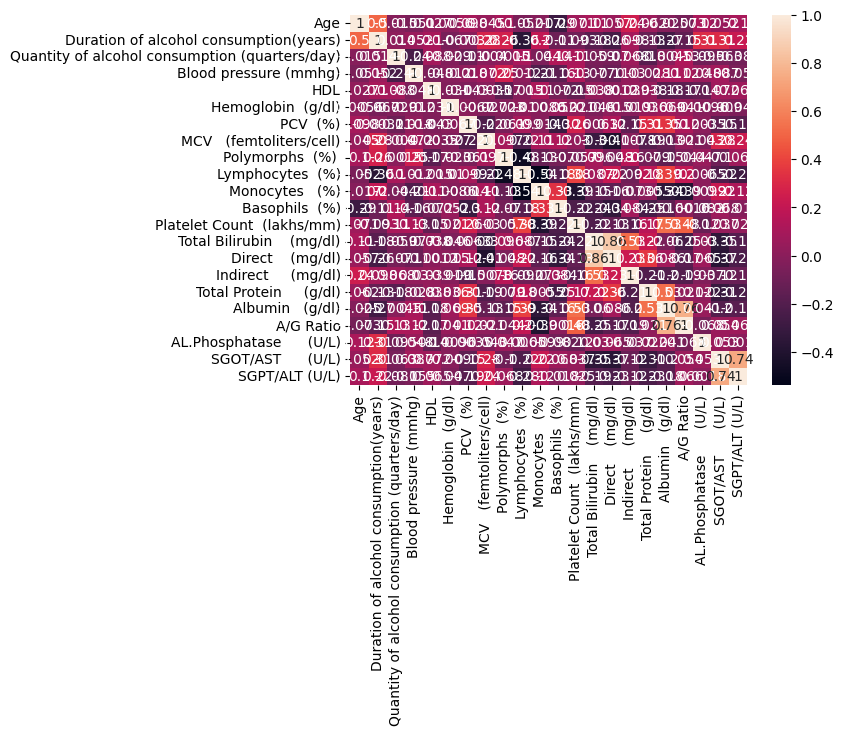

In [ ]:
sns.heatmap(df1.corr(numeric_only=True),annot=True)

Printing all those columns with high coorelation

In [ ]:
correlation_matrix = df1.corr(numeric_only=True)
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2] * 100:.2f}%")


Total Bilirubin    (mg/dl) and Direct    (mg/dl): 86.07%


Since both of them have high coorelation we drop Direct

**EDA COMPLETED AND DATA HAS BEEN ANALYSED**

# DESCRIPTIVE ANALYSIS

In [ ]:
df.describe()

,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Blood pressure (mmhg),TCH,TG,LDL,HDL,Hemoglobin (g/dl),PCV (%),...,Total Bilirubin (mg/dl),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,...,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000
mean,50.588614,20.552632,2.195489,1.567364,195.816696,163.541353,106.040279,34.914618,10.266305,33.900873,...,6.118582,3.704834,2.423035,5.595907,2.529510,3.225369,0.855725,132.292207,80.383459,59.821697
std,8.747285,7.978730,0.817103,0.119739,10.909775,11.975295,6.279703,3.262292,1.887182,5.307312,...,2.195534,1.573631,0.937483,1.265447,0.853937,0.995112,0.396936,27.271596,27.019867,25.076247
min,32.000000,4.000000,1.000000,1.300000,175.000000,145.000000,96.500000,28.500000,5.250000,20.500000,...,0.750000,0.800000,0.500000,2.900000,0.900000,1.000000,0.250000,56.000000,32.000000,23.000000
25%,44.000000,15.000000,2.000000,1.500000,190.000000,160.000000,104.000000,33.000000,9.000000,31.000000,...,4.800000,2.700000,2.000000,5.000000,2.000000,2.500000,0.540000,110.000000,59.000000,41.000000
50%,50.000000,20.000000,2.000000,1.571429,197.423932,161.000000,106.000000,35.516464,10.000000,35.000000,...,6.000000,3.600000,2.400000,6.000000,2.500000,3.100000,0.780000,130.000000,74.000000,49.000000
75%,57.000000,26.000000,3.000000,1.633333,200.000000,170.000000,109.000000,36.000000,11.500000,38.000000,...,7.500000,4.200000,3.000000,6.400000,3.000000,4.000000,1.000000,150.000000,96.000000,76.000000
max,76.500000,42.500000,4.500000,1.833333,215.000000,185.000000,116.500000,40.500000,15.250000,48.000000,...,11.000000,6.450000,4.500000,8.300000,4.500000,6.000000,1.690000,206.000000,151.500000,128.500000


Splitting the data

In [ ]:
df.mean(axis=0,numeric_only=True)


Age                                                 50.588614
Duration of alcohol consumption(years)              20.552632
Quantity of alcohol consumption (quarters/day)       2.195489
Blood pressure (mmhg)                                1.567364
TCH                                                195.816696
TG                                                 163.541353
LDL                                                106.040279
HDL                                                 34.914618
Hemoglobin  (g/dl)                                  10.266305
PCV  (%)                                            33.900873
RBC  (million cells/microliter)                      3.386582
MCV   (femtoliters/cell)                            87.434408
MCH  (picograms/cell)                               30.512111
MCHC  (grams/deciliter)                             31.907273
Total Count                                       8149.711704
Polymorphs  (%)                                     66.932331
Lymphocy

In [ ]:
import pandas as pd
import random

# Select rows where Outcome is "NO"
df_no_outcome = df[df["Outcome"] == "no"]

# Check if df_no_outcome is empty and handle it accordingly
if df_no_outcome.empty:
    print("No rows found with 'NO' outcome. Cannot generate synthetic data.")
else:
    # Generate synthetic rows based on existing "NO" outcome rows
    synthetic_rows = []
    num_synthetic_samples = 300  # Number of synthetic samples to generate

    for _ in range(num_synthetic_samples):
        # Randomly select a row from df_no_outcome
        selected_row = df_no_outcome.sample(n=1).iloc[0]

        # Create a new row with random values based on the selected row
        synthetic_row = selected_row.copy()
        for column in df_no_outcome.columns:
            if df_no_outcome[column].dtype in ["int64", "float64"]:
                # Add noise within a 10% range of the selected row's value
                noise_factor = 0.1 * selected_row[column]
                synthetic_row[column] = random.uniform(selected_row[column] - noise_factor, selected_row[column] + noise_factor)
            elif df_no_outcome[column].dtype == "object":
                synthetic_row[column] = random.choice(df_no_outcome[column].unique())

        synthetic_rows.append(synthetic_row)

    # Convert synthetic rows to a DataFrame and append to the original DataFrame
    synthetic_df = pd.DataFrame(synthetic_rows, columns=df_no_outcome.columns)
    df = pd.concat([df, synthetic_df], ignore_index=True)

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

Encoding the data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in X.columns:
  if X[i].dtype == 'object':
    X[i] = le.fit_transform(X[i])


In [ ]:
y_encoded =(le.fit_transform(y))

In [ ]:
X.head()

,Age,Gender,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Blood pressure (mmhg),Obesity,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
0,55.0,1,12.0,2.0,1,0,0,1,1.533333,1,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56.0,34.0,0
1,55.0,1,12.0,2.0,1,0,0,1,1.533333,1,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56.0,34.0,0
2,55.0,1,12.0,2.0,1,0,0,1,1.533333,0,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56.0,34.0,0
3,55.0,1,12.0,2.0,1,0,0,0,1.533333,0,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56.0,34.0,0
4,55.0,0,12.0,2.0,1,0,0,1,1.533333,0,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56.0,34.0,0


# Feature importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)
importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

Age: 0.0001
Gender: 0.0000
Duration of alcohol consumption(years): 0.1512
Quantity of alcohol consumption (quarters/day): 0.0206
Type of alcohol consumed: 0.0007
Hepatitis B infection: 0.0000
Hepatitis C infection: 0.0000
Diabetes Result: 0.0001
Blood pressure (mmhg): 0.0000
Obesity: 0.0056
Family history of cirrhosis/ hereditary: 0.0001
TCH: 0.0000
TG: 0.0007
LDL: 0.0000
HDL: 0.0004
Hemoglobin  (g/dl): 0.0112
PCV  (%): 0.0015
RBC  (million cells/microliter): 0.0335
MCV   (femtoliters/cell): 0.0000
MCH  (picograms/cell): 0.0230
MCHC  (grams/deciliter): 0.0146
Total Count: 0.0009
Polymorphs  (%) : 0.0131
Lymphocytes  (%): 0.0018
Monocytes   (%): 0.0006
Eosinophils   (%): 0.0027
Basophils  (%): 0.0053
Platelet Count  (lakhs/mm): 0.0378
Total Bilirubin    (mg/dl): 0.1754
Direct    (mg/dl): 0.1428
Indirect     (mg/dl): 0.0055
Total Protein     (g/dl): 0.0058
Albumin   (g/dl): 0.0983
Globulin  (g/dl): 0.0004
A/G Ratio: 0.0301
AL.Phosphatase      (U/L): 0.0062
SGOT/AST      (U/L): 0.0438
SGP

**INFERENCE**

In the given output of feature importances from the RandomForestClassifier model, features have an importance score of 0 or very less. These features are:

Gender

Hepatitis B infection

Hepatitis C infection

Family history of cirrhosis/ hereditary

TCH

TG

LDL

HDL

MCV (femtoliters/cell)

DROPPING ALL UNECESSARY COLUMNS

In [ ]:
drop_col=["Type of alcohol consumed","Gender","Direct    (mg/dl)","MCH  (picograms/cell)","MCHC  (grams/deciliter)","Obesity","Family history of cirrhosis/ hereditary","TCH","LDL","HDL","MCV   (femtoliters/cell)","Total Count","Monocytes   (%)","Basophils  (%)","SGOT/AST      (U/L)","SGPT/ALT (U/L)","MCHC  (grams/deciliter)","RBC  (million cells/microliter)","Quantity of alcohol consumption (quarters/day): 0.0110","Eosinophils   (%)","TG","Hepatitis B infection","Hepatitis C infection","Duration of alcohol consumption(years)","Total Bilirubin    (mg/dl)"]

In [ ]:
#drop_col=["Age","Gender","Hepatitis B infection","Hepatitis C infection","Diabetes Result","Blood pressure (mmhg)","Obesity","Family history of cirrhosis/ hereditary","TCH","TG","LDL","HDL","RBC  (million cells/microliter)","MCV   (femtoliters/cell)","MCH  (picograms/cell)","Total Count","Monocytes   (%)","Eosinophils   (%)","Basophils  (%)","Type of alcohol consumed","MCHC  (grams/deciliter)","Total Bilirubin    (mg/dl)","Duration of alcohol consumption(years)"]

In [ ]:
for col in drop_col:
  if col in X.columns:
    X.drop(columns=[col],inplace=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)
importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

Age: 0.0025
Quantity of alcohol consumption (quarters/day): 0.0732
Diabetes Result: 0.0523
Blood pressure (mmhg): 0.0009
Hemoglobin  (g/dl): 0.0237
PCV  (%): 0.0027
Polymorphs  (%) : 0.0098
Lymphocytes  (%): 0.0049
Platelet Count  (lakhs/mm): 0.0887
Indirect     (mg/dl): 0.0226
Total Protein     (g/dl): 0.0231
Albumin   (g/dl): 0.1384
Globulin  (g/dl): 0.0193
A/G Ratio: 0.1569
AL.Phosphatase      (U/L): 0.0642
USG Abdomen (diffuse liver or  not): 0.3168


Splitting the data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

Since the outcome is highly skewed we oversample the data

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(random_state=0)
X_resampled, y_resampled = os.fit_resample(X_train, y_train)

In [ ]:
X_resampled.columns

Index(['Age', 'Quantity of alcohol consumption (quarters/day)',
       'Diabetes Result', 'Blood pressure (mmhg)', 'Hemoglobin  (g/dl)',
       'PCV  (%)', 'Polymorphs  (%) ', 'Lymphocytes  (%)',
       'Platelet Count  (lakhs/mm)', 'Indirect     (mg/dl)',
       'Total Protein     (g/dl)', 'Albumin   (g/dl)', 'Globulin  (g/dl)',
       'A/G Ratio', 'AL.Phosphatase      (U/L)',
       'USG Abdomen (diffuse liver or  not)'],
      dtype='object')

Both the outcomes are well balanced now

In [ ]:
y_resampled_series = pd.Series(y_resampled)

y_resampled_series.value_counts()

0    724
1    724
Name: count, dtype: int64

# **MODEL TESTING**

# SUPPORT VECTOR MACHINE

Testing in train set

In [ ]:
odel = svm.SVC()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_resampled)
print("Train Accuracy:", accuracy_score(y_resampled, y_pred))

Train Accuracy: 1.0


Testing in train set

In [ ]:
model = svm.SVC()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_matrix)

classification_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report)


Test Accuracy: 0.9109311740890689
Confusion Matrix:
[[ 58   0]
 [ 22 167]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        58
           1       1.00      0.88      0.94       189

    accuracy                           0.91       247
   macro avg       0.86      0.94      0.89       247
weighted avg       0.94      0.91      0.92       247



WITH HYPERPARAMETERS

In [ ]:
model = svm.SVC(C=0.1,kernel="rbf")
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_matrix)

classification_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report)

Test Accuracy: 0.8744939271255061
Confusion Matrix:
[[ 49   9]
 [ 22 167]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.84      0.76        58
           1       0.95      0.88      0.92       189

    accuracy                           0.87       247
   macro avg       0.82      0.86      0.84       247
weighted avg       0.89      0.87      0.88       247



# LOGISTIC REGRESSION

Testing in train set

In [ ]:
model = LogisticRegression(max_iter=1000,penalty="l2",solver="lbfgs",C=0.001)
model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_resampled)

print("Test Accuracy:", accuracy_score(y_resampled, y_pred))

Test Accuracy: 0.944060773480663


Testing in test set

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000,penalty="l2",solver="lbfgs",C=0.001)
model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:")
print(confusion_matrix)

classification_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report)


Test Accuracy: 0.9230769230769231
Confusion Matrix:
[[ 57   1]
 [ 18 171]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86        58
           1       0.99      0.90      0.95       189

    accuracy                           0.92       247
   macro avg       0.88      0.94      0.90       247
weighted avg       0.94      0.92      0.93       247



WITH HYPERPARAMETERS

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(penalty="l1",C=0.01,solver="liblinear")
model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:")
print(confusion_matrix)

classification_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report)

Test Accuracy: 0.9595141700404858
Confusion Matrix:
[[ 58   0]
 [ 10 179]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        58
           1       1.00      0.95      0.97       189

    accuracy                           0.96       247
   macro avg       0.93      0.97      0.95       247
weighted avg       0.97      0.96      0.96       247



Testing with inputs

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=300)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Test Accuracy: 0.9757085020242915
Precision: 1.0
Recall: 0.9682539682539683
F1 Score: 0.9838709677419354


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Test Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
X.to_csv('new_data1.csv', index=False)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:")
print(confusion_matrix)

classification_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report)


Test Accuracy: 1.0
Confusion Matrix:
[[ 58   0]
 [  0 189]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00       189

    accuracy                           1.00       247
   macro avg       1.00      1.00      1.00       247
weighted avg       1.00      1.00      1.00       247



In [ ]:
df.to_csv('new_data.csv', index=False)

In [ ]:
"""import pickle
filename = 'liver_cirosis.pkl'
pickle.dump(model, open(filename, 'wb'))"""


In [ ]:
"""filename = 'logreg_liver_cirosis_model.pkl'
joblib.dump(model,filename)"""

['logreg_liver_cirosis_model.pkl']